## 8_Sprint_8
### Hyphotesis Testing
#### Eloi Canals

#### Exercici 1. 
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona **un atribut** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### Dades.
Accedim a un dataframe de dades estadistiques de combats d'arts marcials mixtes (1993 - 2001), on tenim informació dels lluitadors, categoria, guanyador, tipus de victoria, etc.
Sobre aquestes dades plantejarem unes Hipotesis H1 que validarem o no amb un sampling sobre les dades i tests de Hipotesis testing.

Source:
https://www.kaggle.com/rajeevw/ufcdata

1. Definir Hipotesis Nul·la. Status Quo. H0

- Els lluitadors els cuals tenen un abast de braç mes llarg, tenen més probabilitat de guanyar tant per KO com per submissió (tenir llargues les extremitats serveis tant per cops al oponent i no ser colpejat, com per submissions).

"There is no getting around the fact that there are tangible benefits to height and reach advantages in MMA."

Source: https://evolve-mma.com/blog/does-a-height-and-reach-advantage-necessarily-make-you-a-better-mixed-martial-artist/


2. Definir Hipotesis H1

Ens centrarem només el el 'reach advantage' ja que en el pes, se suposa que els dos lluitadors lluiten en la mateixa categoria de pes, per que l'aventatge de pes no s'hauria de considerar.

Formulem la hipotesis H1 dient que el 'reach advantage' no es definitiu a l'hora de conseguir una victoria en MMA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ufc_df = pd.read_csv('archive/data.csv')

ufc_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [2]:
ufc_df.shape

(6012, 144)

In [3]:
# El dataset te moltes columnes, es fa una primera tria de les que a priori
# poden ser interessants per declarar la hipotesis.

In [4]:
with pd.option_context('display.max_columns', None):
    print (ufc_df)

          R_fighter           B_fighter        Referee        date  \
0      Adrian Yanez       Gustavo Lopez  Chris Tognoni  2021-03-20   
1      Trevin Giles       Roman Dolidze      Herb Dean  2021-03-20   
2       Tai Tuivasa     Harry Hunsucker      Herb Dean  2021-03-20   
3     Cheyanne Buys   Montserrat Conejo     Mark Smith  2021-03-20   
4     Marion Reneau       Macy Chiasson     Mark Smith  2021-03-20   
...             ...                 ...            ...         ...   
6007  Remco Pardoel  Alberta Cerra Leon  John McCarthy  1994-03-11   
6008   Orlando Wiet    Robert Lucarelli  John McCarthy  1994-03-11   
6009  Johnny Rhodes       David Levicki  John McCarthy  1994-03-11   
6010  Patrick Smith          Ray Wizard  John McCarthy  1994-03-11   
6011   Scott Morris      Sean Daugherty  John McCarthy  1994-03-11   

                    location Winner  title_bout       weight_class  B_avg_KD  \
0     Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   

In [5]:
# Reduïm les columnes del dataset
ufc_columns_mask = ['R_fighter','B_fighter','Winner','weight_class','B_total_time_fought(seconds)','B_total_rounds_fought','B_total_title_bouts','B_current_win_streak','B_current_lose_streak','B_longest_win_streak','B_wins','B_losses','B_draw','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','R_total_time_fought(seconds)','R_total_rounds_fought','R_total_title_bouts','R_current_win_streak','R_current_lose_streak','R_longest_win_streak','R_wins','R_losses','R_draw','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_Stance','R_Height_cms','R_Reach_cms','R_Weight_lbs','B_age','R_age']
ufc_df_sel = ufc_df[ufc_columns_mask].copy(deep=True)
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [6]:
# Filtrem els que tenen valors a les columnes reach

## reach_df = ufc_df_sel.dropna(subset = ["B_Reach_cms","R_Reach_cms"]) 

# DISABLED. Al fer el dropna s'ometen aproximadament el 20% de files.
# El resultat no seria cientific.
# Un cop discutit amb el mentor, es decideix reomplir els que no tinguin la informació
# de reach amb la mitja aritmetica dels lluitadors.

ufc_reach_mean = (ufc_df_sel.B_Reach_cms.mean() + ufc_df_sel.R_Reach_cms.mean()) / 2
ufc_reach_mean

183.39551664419776

In [7]:
# Creem les noves columnes

def isNaN(num):
    return num!= num
        
B_New_Reach = ufc_df_sel.B_Reach_cms.apply(lambda x: ufc_reach_mean if isNaN(x) == True else x)
B_New_Reach

R_New_Reach = ufc_df_sel.R_Reach_cms.apply(lambda x: ufc_reach_mean if isNaN(x) == True else x)
R_New_Reach

0       177.800000
1       187.960000
2       190.500000
3       160.020000
4       172.720000
           ...    
6007    183.395517
6008    183.395517
6009    183.395517
6010    183.395517
6011    183.395517
Name: R_Reach_cms, Length: 6012, dtype: float64

In [8]:
# Creem la columna reach_diff entre lluitadors
# OLD reach_diff = reach_df.B_Reach_cms - reach_df.R_Reach_cms
reach_diff = B_New_Reach - R_New_Reach
reach_diff

0       -7.62
1        5.08
2        0.00
3       -5.08
4       10.16
        ...  
6007     0.00
6008     0.00
6009     0.00
6010     0.00
6011     0.00
Length: 6012, dtype: float64

#### Tenim una mostra amb dades de 4964/6012

In [9]:
# Afegim la columna
reach_diff.columns = ['Reach_Diff']
reach_diff

0       -7.62
1        5.08
2        0.00
3       -5.08
4       10.16
        ...  
6007     0.00
6008     0.00
6009     0.00
6010     0.00
6011     0.00
Length: 6012, dtype: float64

In [10]:
# OLD reach_df['Reach_Diff'] = reach_diff
ufc_df_sel['Reach_Diff'] = reach_diff
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Reach_Diff
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,-7.62
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,5.08
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,0.00
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,-5.08
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,10.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,0.00
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,0.00
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,0.00
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,0.00


#### Eliminem els que la diferencia sigui 0 perque si no hi ha diferencia entre el reach no es determinant per la victoria final.

In [34]:
#reach_df = reach_df[reach_df.Reach_Diff != 0.00]
##reach_df

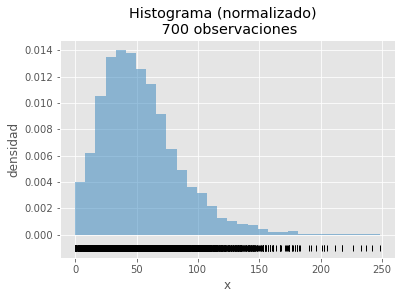

In [12]:
# Mirem si les dades es corresponen a una distribució gaussiana
plt.style.use('ggplot')

muestra_1 = np.random.normal(loc=20, scale=5, size=200)
muestra_2 = np.random.normal(loc=40, scale=5, size=500)
# OLD datos = np.hstack((reach_df.Reach_Diff))
datos = np.hstack((ufc_df.R_avg_TOTAL_STR_landed))

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(datos, bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
ax.set_title('Histograma (normalizado)  \n 700 observaciones')
ax.set_xlabel('x')
ax.set_ylabel('densidad');

In [45]:
# PENDENT: Investigar huecos de valors¿?
# PENDENT: Imputar valors de la mitja als valors NaN

In [13]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = ufc_df.B_avg_TOTAL_STR_landed
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=nan, p=nan
Probably not Gaussian


In [14]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = ufc_df.B_avg_TOTAL_STR_landed
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=nan
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level



#### Exercici 2. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **dos altres atributs** del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

#### Exercici 3. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **tres atributs** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.